# Climate Change Belief Analysis 2022

### Overview: Predict an individual’s belief in climate change based on historical tweet data.
   
- Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. 

## Problem Statement
In this project we would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to companies market research efforts in gauging how their product/service may be received.

### Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

### Sentiment of tweet Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="pZRIYy5yWLxOVTSX7gAbXSwXX",
    project_name="climate-change-belief-analysis",
    workspace="sodiq-olamide")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sodiq-olamide/climate-change-belief-analysis/b785149b17a249ddaa367905589fe58d



In [20]:
#NumPy can be used to perform a wide variety of mathematical operations on arrays
import numpy as np
#Pandas is used for working with data sets.It has functions for analyzing, cleaning, exploring, and manipulating data.
import pandas as pd
#Below are comprehensive libraries for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# set plot style
sns.set()
#Regular Expression used for data cleaning
import re
#
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we to load the data file's into a DataFrame. |

---

In [3]:
#Load the tweet dataset into a dataframe named "df"
df = pd.read_csv("train.csv")

Getting a view of our training dataset

In [22]:
#Viewing the dataframe.
df.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we perform an in-depth analysis of all the variables in the DataFrame. |

---


Get the shape of the data to understand the number of observations in the dataset

In [21]:
#Take a look at the shape of the dataset
display(df.shape)

(15819, 3)

The tweet train dataset contains 15819 rows and 3 columns 

Get a full summary of dataset

In [7]:
df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


The describe functions mostly give a statistical summary for numerical columns, that is why the message column is not present above. 

Get full info about all the features in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Both sentiment and tweet id are numerical columns with an Integer datatype.
This conforms with the statistical summary with the describe function.

Check for any missing values are present in the dataset.

In [14]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

The train dataset contains zero missing values, and just to track changes.

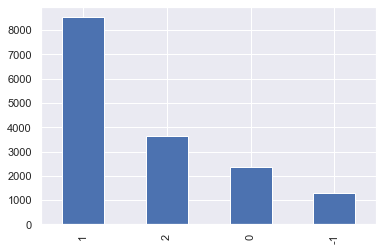

In [11]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

It looks like more than half of the tweets samples supports the beliefs of man-made climate change, while very few tweet sample does not believe in man-made climate change.

Let's have a look at how many data samples we have for each of the different label of sentiment.

In [13]:
#Checking for unique values in the columns
print("The Value count of all sentiment labels:", "\n\n", df["sentiment"].value_counts(), "\n")

The Value count of all sentiment labels: 

  1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64 



We'll print off a list of all the "sentiments" labels which are present in this dataset.

In [9]:
sentiment_label = list(df['sentiment'].unique())
print(sentiment_label)

[1, 2, 0, -1]


Get unique values for each feature, this will help us know if any unwanted character are present in the dataset

In [15]:
for col in df.keys():
    print(col, df[col].unique()[30:50])

sentiment [ 1  2  0 -1]
message ["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"
 "It's not like we lack evidence of anthropogenic global warming"
 'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'
 '#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD'
 "RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"
 "Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j"
 'RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R'
 'RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ

Viewing an Entire length of message feature in the tweet dataframe, so as to find patterns on how most tweet messages are typed.

In [38]:
print('Show the full_text of 10 tweets: ')
for tweet in df['message'][100:110]:
    print(tweet)

Show the full_text of 10 tweets: 
So we have a director of EPA who is a climate change denier. No a coal lobbies to as deputy EPA Chief. Environment… https://t.co/XlxHbWNJuM
RT @IrisRimon: The Chinese just broke massive iceberg in Antarctica as part of their global warming hoax.
RT @thinkprogress: Where are Rex Tillerson’s climate change emails?
https://t.co/LyANHBPZfT
RT @M3thG0d: If global warming isn't real why did club penguin shut down
RT @NDeNicolaMD: 500,000 doctors agree: climate change is making us sick #EarthDay #MarchForScience #HealthAndClimate…
RT @tristinc1: our president think climate change is a hoax made by the chinese &amp; our vice president thinks being gay is a curable disease.Ã¢â‚¬Â¦
80% of GHG via resevoirs are methane. Resevoirs play a substantial role in global warming. https://t.co/CNHiU818Ky https://t.co/58nmAFxcmP
RT @Fruitloopian: Why is there snow in March if we have global warming?
RT @GreenHarvard: “Universities have a uniquely important role to play in 

Alright... Progress, we can now easily see the full_text in every row of the message.

### Key Insights
 - 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we are required to create one or more regression models that are able to accurately predict the Individual Beliefs on Climate Changes. |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [3]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sodiq-olamide/climate-change-belief-analysis/b337f1d9c4194cbb97804e6174256d89
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.25 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Uploading 1 metrics, params and output messages
COMET INFO: Waiting for completion of the fil